In [18]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

In [22]:
import numpy as np
import pandas as pd
import seaborn as sb

In [29]:
data = pd.read_csv('data.csv')
print(data.shape)

(10462, 16)


In [30]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,flight_time,Duration(sec)
0,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2,No info,17135,2019,1,3,morning,140700
1,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1,1 Long layover,14594,2019,1,3,morning,75900
2,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,1 Long layover,22270,2019,1,3,afternoon,63300
3,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1,No info,26890,2019,1,3,morning,79500
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,0,No info,12649,2019,1,3,evening,10500


In [31]:
draft = data.select_dtypes(include=['int'])
draft.shape

(10462, 6)

In [32]:
draft.head()

,Total_Stops,Price,year,month,Day,Duration(sec)
0,2,17135,2019,1,3,140700
1,1,14594,2019,1,3,75900
2,1,22270,2019,1,3,63300
3,1,26890,2019,1,3,79500
4,0,12649,2019,1,3,10500


In [34]:
draft.isna().sum() 

Total_Stops      0
Price            0
year             0
month            0
Day              0
Duration(sec)    0
dtype: int64

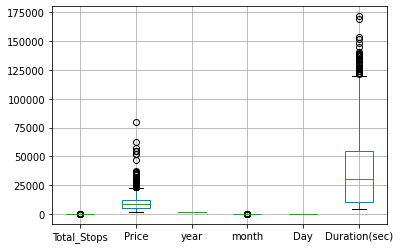

In [35]:
draft.boxplot()

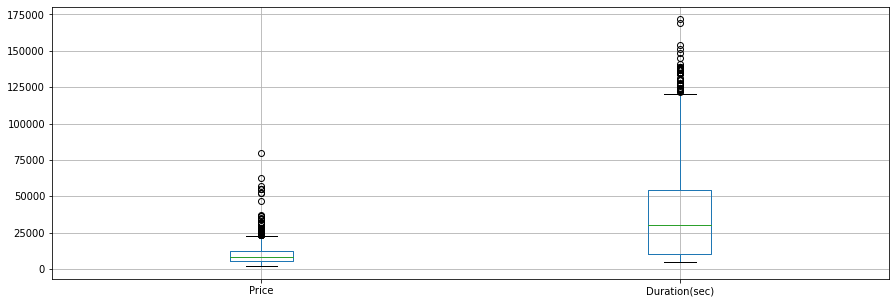

In [38]:
draft[['Price','Duration(sec)']].boxplot(figsize=(15,5))

In [41]:
def find_all_outliers(v):
    Q1 = np.quantile(v, 0.25)  
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)    
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [45]:
outliers = find_all_outliers(draft['Price'])
#outliers[0]   # Indices 
#outliers[1]  # valeurs 

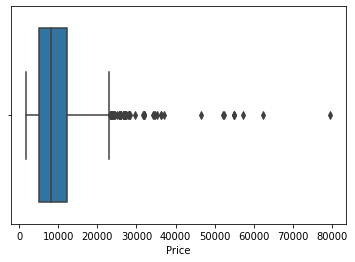

In [48]:
sb.boxplot(x = 'Price', data = draft)